# Bank Authentification Data Set

[Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.contrib.learn as learn
%matplotlib inline

/Users/Rioux/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
df = pd.read_csv("bank_note_data.csv")

In [3]:
df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.describe()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


## EDA

In [5]:
df.columns

Index(['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy', 'Class'], dtype='object')

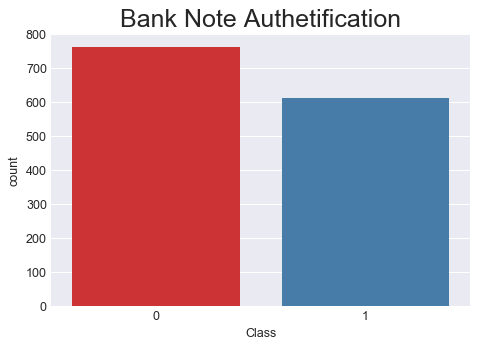

In [30]:
plt.figure(dpi=90)
sns.set_style("darkgrid")
sns.countplot(df["Class"], palette="Set1")
plt.title("Bank Note Authetification", fontsize=20)
plt.show()

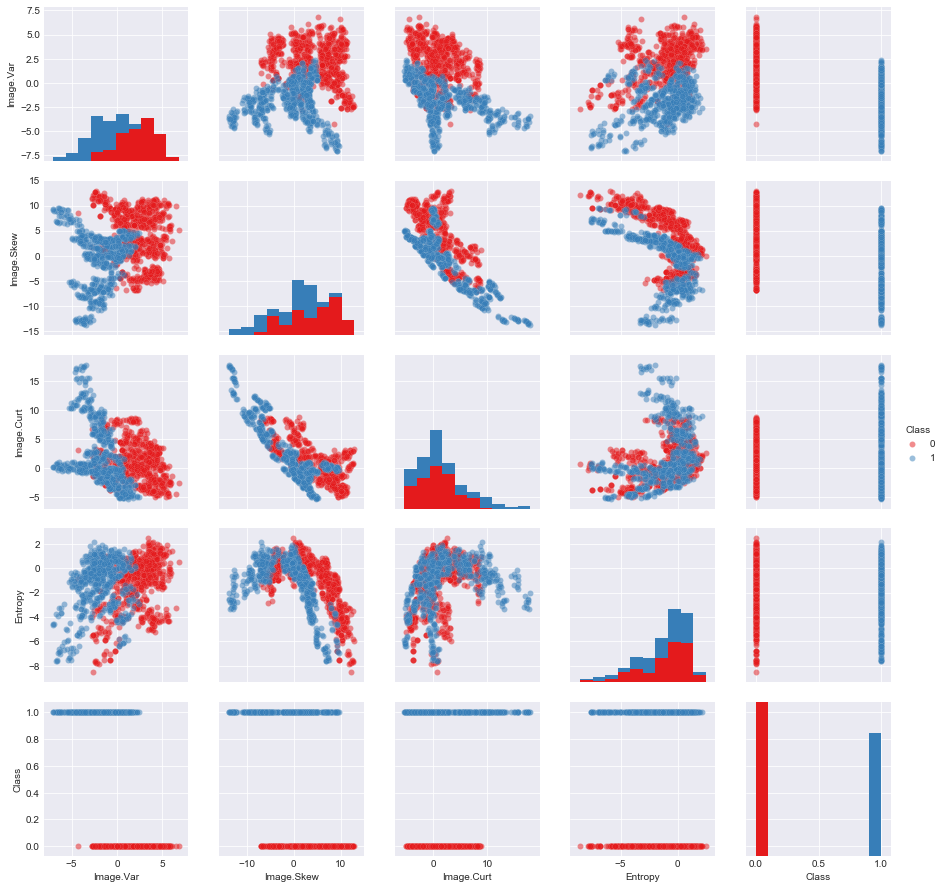

In [59]:
sns.pairplot(df, hue="Class", palette="Set1", plot_kws={'alpha': 0.5, "lw": 0.15})

## Data Manipulation

In [88]:
# Scaled the features
from sklearn.preprocessing import StandardScaler

In [81]:
features_df = df.drop("Class", axis=1)

In [62]:
scaler = StandardScaler()

In [82]:
scaler.fit(features_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [83]:
scaled_features = scaler.transform(features_df)

In [89]:
# Put the scaled datas into a dataframe
scaled_df = pd.DataFrame(data = scaled_features, index=features_df.index, 
                         columns=features_df.columns)

In [90]:
scaled_df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## Train Test Split

In [91]:
from sklearn.model_selection import train_test_split

In [96]:
# Transform the 2 dataframe to numpy array in order for TensorFlow to accept our data!
X = scaled_df.as_matrix()
y = df["Class"].as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Contrib.Learn

In [97]:
import tensorflow.contrib.learn as learn

In [100]:
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train.astype("float32"))

In [102]:
clf = learn.DNNClassifier(hidden_units=[10,20,10], feature_columns=feature_columns, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c408400f0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/gf/bvnvfh0s21x1yrbw8vsz0mt00000gn/T/tmpl0oj9j80'}


In [104]:
clf.fit(X_train, y_train, steps=200, batch_size=20)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /var/folders/gf/bvnvfh0s21x1yrbw8vsz0mt00000gn/T/tmpl0oj9j80/model.ckpt-1
INFO:tensorflow:Saving checkpoints for 2 into /var/folders/gf/bvnvfh0s21x1yrbw8vsz0mt00000gn/T/tmpl0oj9j80/model.ckpt.
INFO:tensorflow:loss = 0.695708, step = 2
INFO:tensorflow:global_step/sec: 1060.72
INFO:tensorflow:loss = 0.0326681, step = 102 (0.095 sec)
INFO:tensorflow:Saving checkpoints for 201 into /var/folders/gf/bvnvfh0s21x1yrbw8vsz0mt00000gn/T/tmpl0oj9j80/model.ckpt.
INFO:tensorflow:Loss for final step: 0.013692.


DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x1c40840f98>, 'hidden_units': [10, 20, 10], 'feature_columns': (_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x1a12db1f28>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

# Predictions + Model evaluation

In [111]:
predictions = list(clf.predict(X_test))

INFO:tensorflow:Restoring parameters from /var/folders/gf/bvnvfh0s21x1yrbw8vsz0mt00000gn/T/tmpl0oj9j80/model.ckpt-201


In [112]:
print(predictions)

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 

In [113]:
from sklearn.metrics import classification_report, confusion_matrix

In [114]:
print(classification_report(y_test, predictions))
print("\n")
print(confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       238
          1       1.00      1.00      1.00       174

avg / total       1.00      1.00      1.00       412



[[238   0]
 [  0 174]]


# Output comparaison with a random forest model

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
randFo = RandomForestClassifier()

randFo.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [119]:
randFoPred = randFo.predict(X_test)

In [120]:
print(classification_report(y_test, randFoPred))
print("\n")
print(confusion_matrix(y_test, randFoPred))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99       238
          1       0.98      0.99      0.99       174

avg / total       0.99      0.99      0.99       412



[[235   3]
 [  1 173]]


### The Random Forest Classifier have done some errors compared to the DNN Classifier who have 100% accuracy